# Redes Neuronales Recurrentes aplicadas a la calidad del agua

De acuerdo al planteamiento pedido para la toma de datos en este caso la generacion de un dataset sintetico respecto a la calidad del agua se revisó el siguiente documento `https://www.bivica.org/files/normativa-calidad-agua.pdf` sobre la normativa nacional de los riquisitos del agua donde es posible determinar los campos fisicos, organolepticos, quimicos, parametros de desinfeccion, plaguicidas, radioactividad, microbiologicos y de control referencial, se tomo en cuenta los valores de control refencial y los requisitos fisicos dado que estos demostraran el proceso por el cual el agua pasa para asegurar su potabilidad teniendo como referencia la calidad del agua previo tratamiento y post tratamiento.

### Importacion de librerias

In [79]:
import numpy as np
import matplotlib.pyplot as plt

### Generacion del dataset sintetico

In [94]:
def generate_water_quality_data(batch_size, n_steps):
    # Define parameters for water quality
    conductivity = 1500.0  # µS/cm
    alkalinity = 370.0  # mg/L CaCO3
    langelier_index = np.random.uniform(-0.5, 0.5, size=(batch_size, 1))
    
    # Generate time steps
    time = np.linspace(0, 1, n_steps)
    
    # Generate water quality data
    conductivity_data = conductivity + 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)
    alkalinity_data = alkalinity + 0.05 * (np.random.rand(batch_size, n_steps) - 0.5)
    
    # Scale alkalinity based on Langelier index
    alkalinity_data *= (1 + langelier_index * 0.2)  # Adjust based on Langelier index
    
    # Additional parameters for water quality
    color_data = 15 + 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)
    turbidity_data = 5 + 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)
    dissolved_solids_data = 1000 + 10 * (np.random.rand(batch_size, n_steps) - 0.5)
    
    return np.concatenate([conductivity_data[..., np.newaxis], 
                            alkalinity_data[..., np.newaxis],
                            color_data[..., np.newaxis],
                            turbidity_data[..., np.newaxis],
                            dissolved_solids_data[..., np.newaxis]], axis=-1).astype(np.float32)

In [95]:
n_steps = 50
water_quality_data = generate_water_quality_data(43800, n_steps + 1)

# Split data into train, validation, and test sets
X_train, y_train = water_quality_data[:30660, :n_steps], water_quality_data[:30660, -1]
X_valid, y_valid = water_quality_data[30660:39480, :n_steps], water_quality_data[30660:39480, -1]
X_test, y_test = water_quality_data[39480:, :n_steps], water_quality_data[39480:, -1]
X_train.shape, y_train.shape

((30660, 50, 5), (30660, 5))

In [82]:
print (water_quality_data)

[[[1500.0004     352.4481      14.977906     5.0344286  995.90466  ]
  [1500.008      352.44662     14.955046     5.0074816 1002.07886  ]
  [1499.9954     352.44458     15.032939     4.9893017  997.5244   ]
  ...
  [1499.9833     352.46506     15.023155     5.019889  1003.41284  ]
  [1500.0223     352.442       15.022055     4.973032   999.4997   ]
  [1499.9768     352.47375     14.999568     4.9816904 1000.28796  ]]

 [[1500.0304     341.80045     14.954098     4.9518814  998.2206   ]
  [1499.9779     341.80392     15.0146265    5.0152516 1000.1068   ]
  [1499.97       341.7888      15.023211     5.0263233 1004.4484   ]
  ...
  [1500.0265     341.7922      14.962768     4.9789734 1003.87494  ]
  [1499.9808     341.79266     14.960354     5.0373363  999.85913  ]
  [1500.0183     341.78574     14.969071     4.9650493  998.2141   ]]

 [[1499.9564     343.5454      15.005477     4.9741316 1004.3473   ]
  [1500.0239     343.512       15.035682     5.0165133 1002.7849   ]
  [1500.0469     3

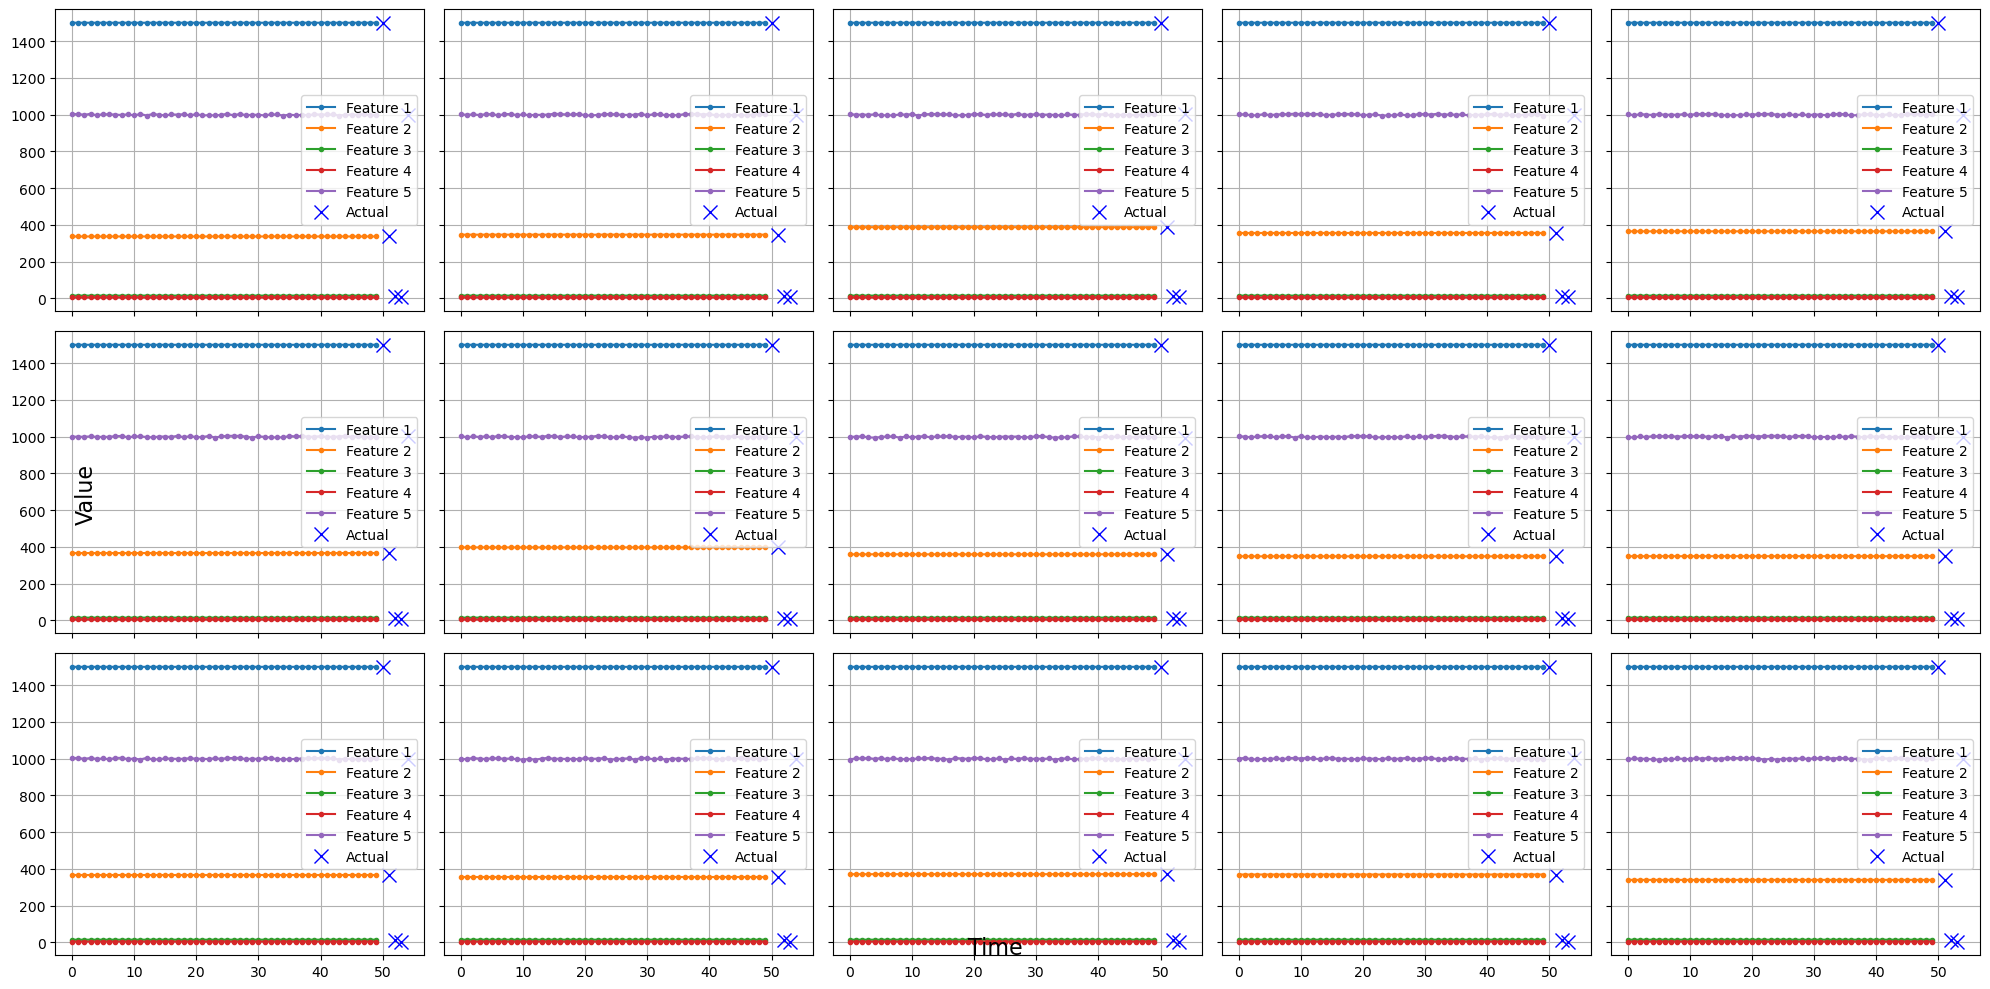

In [96]:
def plot_water_quality_data(X, y, y_pred=None, y_pred_std=None, x_label="Time", y_label="Value"):
    batch_size, n_steps, n_features = X.shape
    
    num_plots = min(batch_size, 15)  # Maximum 15 plots for better visualization
    num_cols = 5
    num_rows = (num_plots - 1) // num_cols + 1
    
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, sharey=True, sharex=True, figsize=(20, 10))
    
    for i in range(num_plots):
        row = i // num_cols
        col = i % num_cols
        ax = axes[row, col]
        
        for feature_idx in range(n_features):
            ax.plot(X[i, :, feature_idx], ".-", label=f'Feature {feature_idx + 1}')
        
        if y is not None:
            ax.plot(range(n_steps, n_steps+len(y[i])), y[i], "bx", markersize=10, label='Actual')
        
        if y_pred is not None:
            ax.plot(range(n_steps, n_steps+len(y_pred[i])), y_pred[i], "ro", label='Predicted')
        
        if y_pred_std is not None:
            ax.plot(range(n_steps, n_steps+len(y_pred[i])), y_pred[i] + y_pred_std[i], 'r--', alpha=0.5)
            ax.plot(range(n_steps, n_steps+len(y_pred[i])), y_pred[i] - y_pred_std[i], 'r--', alpha=0.5)
        
        ax.grid(True)
        ax.legend()
    
    for ax in axes.flat:
        ax.label_outer()
    
    fig.text(0.5, 0.04, x_label, ha='center', fontsize=16)
    fig.text(0.04, 0.5, y_label, va='center', rotation='vertical', fontsize=16)
    
    plt.tight_layout()
    plt.show()

# Assuming you have generated X_test and y_test for your synthetic dataset
plot_water_quality_data(X_test, y_test)